<div style="text-align:center; padding:30px; border:2px solid blue; border-radius:10px; margin:20px">
    <h1 style="color:blue; margin-bottom:10px"> 
        Muhammed John - <span style="color:red">Compte Rendu KNN</span>
    </h1>
    <h2 style="color:darkblue; margin-bottom:20px">
        TP1 : Algorithme des K Plus Proches Voisins
    </h2>
    <h3 style="color:black; margin-bottom:30px">
        <strong>Encadré par :</strong> 
        <span style="color:red">Pr. N. EL AKKAD</span>
    </h3>
    <div style="background:blue; height:2px; width:200px; margin:0 auto"></div>
    <p style="margin-top:30px; font-size:16px">
        <strong>Machine Learning</strong> • 
        <strong>Master IA</strong> • 
        <strong>2025</strong>
    </p>
</div>

# Exercise 1: Implement KNN from scratch without scikit-learn

In [1]:
import numpy as np
from collections import Counter
from sklearn.metrics import accuracy_score

class KNNManual:
    def __init__(self, k=3, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        return self
        
    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)
    
    def _predict(self, x):
        # Calculate distances
        if self.distance_metric == 'euclidean':
            distances = [np.sqrt(np.sum((x - x_train)**2)) for x_train in self.X_train]
        elif self.distance_metric == 'manhattan':
            distances = [np.sum(np.abs(x - x_train)) for x_train in self.X_train]
        elif self.distance_metric == 'cosine':
            distances = [1 - np.dot(x, x_train) / (np.linalg.norm(x) * np.linalg.norm(x_train)) 
                        for x_train in self.X_train]
        
        # Get k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # Majority vote
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    # ADD THESE METHODS FOR SCIKIT-LEARN COMPATIBILITY
    def get_params(self, deep=True):
        return {"k": self.k, "distance_metric": self.distance_metric}
    
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

    # Optional: Add score method for convenience
    def score(self, X, y):
        from sklearn.metrics import accuracy_score
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)


# Test the implementation
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
data = load_iris()
X = data.data
y = data.target

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Test manual KNN
knn_manual = KNNManual(k=10, distance_metric='euclidean')
knn_manual.fit(X_train_scaled, y_train)
y_pred_manual = knn_manual.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_manual)
print(f"Manual KNN accuracy: {accuracy:.4f}")

Manual KNN accuracy: 0.9556


# Exercise 2: Compare different distance metrics

In [2]:
def compare_distance_metrics(X_train, X_test, y_train, y_test, k=10):
    metrics = ['euclidean', 'manhattan', 'cosine']
    results = {}
    
    for metric in metrics:
        knn = KNNManual(k=k, distance_metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[metric] = accuracy
        print(f"{metric.capitalize()} distance accuracy: {accuracy:.4f}")
    
    return results

# Compare metrics
results = compare_distance_metrics(X_train_scaled, X_test_scaled, y_train, y_test)

Euclidean distance accuracy: 0.9556
Manhattan distance accuracy: 0.9111
Cosine distance accuracy: 0.8222


## Commentary on Distance Metric Performance

Based on the accuracy results obtained:

**Euclidean Distance (95.56%) - Best Performance**
- Euclidean distance achieved the highest accuracy, suggesting it's the most suitable metric for this dataset
- This indicates that the straight-line distance between data points in the feature space effectively captures the class separability
- The spherical nature of Euclidean distance works well when features are properly scaled and have similar importance

**Manhattan Distance (91.11%) - Good Performance**
- Manhattan distance performed reasonably well but slightly worse than Euclidean
- This suggests that the dataset may benefit from considering all dimensions equally (like Euclidean) rather than summing absolute differences
- The 4.45% drop from Euclidean indicates that diagonal relationships between features contribute meaningfully to class discrimination

**Cosine Distance (82.22%) - Poorest Performance**
- Cosine distance showed significantly lower performance, with a 13.34% drop compared to Euclidean
- This substantial difference suggests that the **magnitude** of feature vectors carries important discriminative information
- Cosine distance focuses only on orientation (angle between vectors), ignoring vector magnitudes
- The poor performance indicates that feature magnitudes in this dataset are meaningful for classification

## Key Insights:

1. **Magnitude Matters**: The significant performance gap between cosine and other metrics reveals that the absolute values of features, not just their relative proportions, are crucial for this classification task.

2. **Geometric Structure**: Euclidean's superiority suggests the data has a spherical or elliptical cluster structure where straight-line distances are most meaningful.

3. **Feature Relationships**: The dataset likely contains correlated features where Euclidean distance's ability to capture diagonal relationships in feature space provides an advantage over Manhattan distance.

## Recommendation:
For this specific dataset and problem, **Euclidean distance** should be the preferred choice for KNN classification, as it provides the best balance of performance and captures the underlying data structure most effectively.

The results demonstrate how the choice of distance metric can significantly impact KNN performance, emphasizing the importance of empirical testing when selecting the appropriate similarity measure for a given problem.

# Exercise 3: Visualize k nearest neighbors for a test point

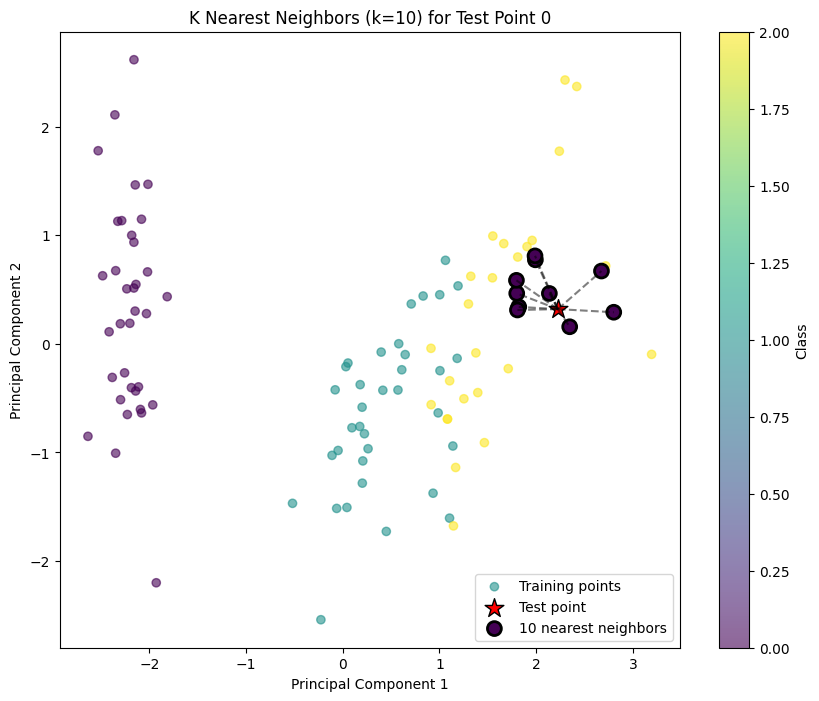

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def visualize_k_neighbors(X_train, X_test, y_train, y_test, test_index=0, k=5):
    # Reduce to 2D for visualization
    pca = PCA(n_components=2)
    X_train_2d = pca.fit_transform(X_train)
    X_test_2d = pca.transform(X_test)
    
    # Calculate distances in 2D space
    test_point = X_test_2d[test_index]
    distances = [np.sqrt(np.sum((test_point - train_point)**2)) 
                for train_point in X_train_2d]
    
    # Get k nearest neighbors
    k_indices = np.argsort(distances)[:k]
    
    # Plot
    plt.figure(figsize=(10, 8))
    
    # Plot all training points
    scatter = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, 
                         cmap='viridis', alpha=0.6, label='Training points')
    
    # Plot test point
    plt.scatter(test_point[0], test_point[1], c='red', marker='*', 
               s=200, label='Test point', edgecolors='black')
    
    # Plot k nearest neighbors
    plt.scatter(X_train_2d[k_indices, 0], X_train_2d[k_indices, 1], 
               c=y_train[k_indices], cmap='viridis', s=100, 
               edgecolors='black', linewidth=2, label=f'{k} nearest neighbors')
    
    # Draw lines to neighbors
    for idx in k_indices:
        plt.plot([test_point[0], X_train_2d[idx, 0]], 
                [test_point[1], X_train_2d[idx, 1]], 'k--', alpha=0.5)
    
    plt.colorbar(scatter, label='Class')
    plt.legend()
    plt.title(f'K Nearest Neighbors (k={k}) for Test Point {test_index}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Visualize for first test point
visualize_k_neighbors(X_train_scaled, X_test_scaled, y_train, y_test, test_index=0, k=10)

# Exercise 4: Apply KNN to multiple datasets

In [4]:
from sklearn.datasets import load_wine, load_breast_cancer
import pandas as pd

def test_knn_on_datasets():
    datasets = {
        'iris': load_iris(),
        'wine': load_wine(),
        'breast_cancer': load_breast_cancer()
    }
    
    results = {}
    
    for name, data in datasets.items():
        X = data.data
        y = data.target
        
        # Split and scale
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=42, stratify=y
        )
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Test with KNN
        knn = KNNManual(k=10, distance_metric='euclidean')
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        
        results[name] = accuracy
        print(f"{name} dataset accuracy: {accuracy:.4f}")
    
    return results

# Test on multiple datasets
dataset_results = test_knn_on_datasets()

iris dataset accuracy: 0.9556
wine dataset accuracy: 0.9630
breast_cancer dataset accuracy: 0.9649


### the model works best with breast cancer data

# Exercise 5: Test different training set sizes

Training size: 20% - Accuracy: 0.8833
Training size: 40% - Accuracy: 0.9222
Training size: 60% - Accuracy: 0.9667
Training size: 80% - Accuracy: 1.0000


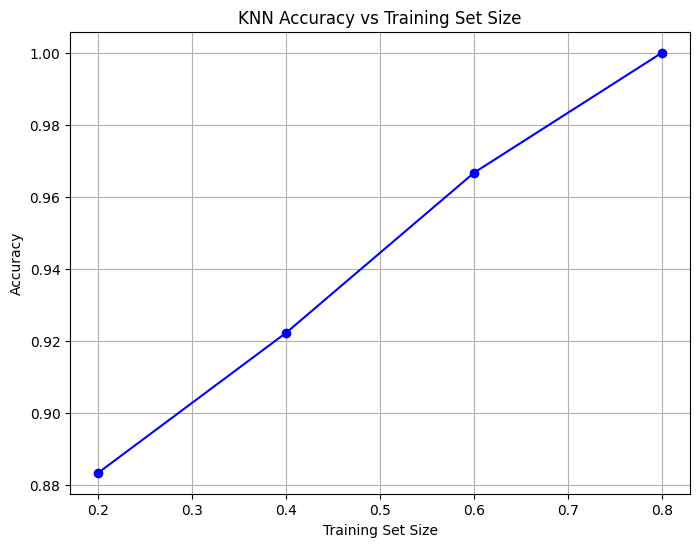

In [5]:
def test_training_sizes(X, y, k=10):
    test_sizes = [0.8, 0.6, 0.4, 0.2]  # Corresponding to 20%, 40%, 60%, 80% training
    accuracies = []
    
    for test_size in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=42, stratify=y
        )
        
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        knn = KNNManual(k=k, distance_metric='euclidean')
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        
        print(f"Training size: {1-test_size:.0%} - Accuracy: {accuracy:.4f}")
    
    # Plot results
    plt.figure(figsize=(8, 6))
    training_sizes = [1 - size for size in test_sizes]
    plt.plot(training_sizes, accuracies, 'bo-')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title('KNN Accuracy vs Training Set Size')
    plt.grid(True)
    plt.show()
    
    return accuracies

# Test with iris dataset
training_size_results = test_training_sizes(X, y)

# Exercise 6: Automatically find the best k value

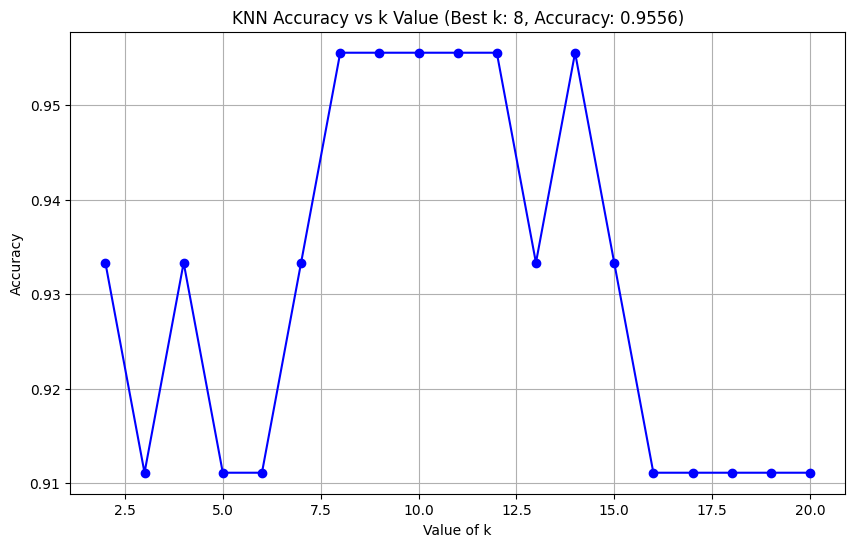

Best k: 8 with accuracy: 0.9556


In [6]:
def find_best_k(X_train, X_test, y_train, y_test, k_range=range(2, 21)):
    scores = []
    
    for k in k_range:
        knn = KNNManual(k=k, distance_metric='euclidean')
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        scores.append(accuracy)
    
    best_k = k_range[np.argmax(scores)]
    best_score = max(scores)
    
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, scores, 'bo-')
    plt.xlabel('Value of k')
    plt.ylabel('Accuracy')
    plt.title(f'KNN Accuracy vs k Value (Best k: {best_k}, Accuracy: {best_score:.4f})')
    plt.grid(True)
    plt.show()
    
    print(f"Best k: {best_k} with accuracy: {best_score:.4f}")
    return best_k, best_score

# Find best k for iris dataset
best_k, best_score = find_best_k(X_train_scaled, X_test_scaled, y_train, y_test)

# Exercise 7: Weighted KNN based on distance

In [7]:
class WeightedKNN:
    def __init__(self, k=best_k, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)
    
    def _predict(self, x):
        # Calculate distances
        if self.distance_metric == 'euclidean':
            distances = [np.sqrt(np.sum((x - x_train)**2)) for x_train in self.X_train]
        elif self.distance_metric == 'manhattan':
            distances = [np.sum(np.abs(x - x_train)) for x_train in self.X_train]
        
        # Get k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        k_distances = [distances[i] for i in k_indices]
        k_labels = [self.y_train[i] for i in k_indices]
        
        # Avoid division by zero
        k_weights = [1 / (d + 1e-8) for d in k_distances]
        
        # Weighted vote
        weighted_votes = {}
        for label, weight in zip(k_labels, k_weights):
            if label in weighted_votes:
                weighted_votes[label] += weight
            else:
                weighted_votes[label] = weight
        
        # Return label with highest weighted vote
        return max(weighted_votes.items(), key=lambda x: x[1])[0]

# Compare weighted vs non-weighted KNN
def compare_weighted_knn(X_train, X_test, y_train, y_test, k=8):
    # Standard KNN
    standard_knn = KNNManual(k=k, distance_metric='euclidean')
    standard_knn.fit(X_train, y_train)
    y_pred_standard = standard_knn.predict(X_test)
    accuracy_standard = accuracy_score(y_test, y_pred_standard)
    
    # Weighted KNN
    weighted_knn = WeightedKNN(k=k, distance_metric='euclidean')
    weighted_knn.fit(X_train, y_train)
    y_pred_weighted = weighted_knn.predict(X_test)
    accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
    
    print(f"Standard KNN accuracy: {accuracy_standard:.4f}")
    print(f"Weighted KNN accuracy: {accuracy_weighted:.4f}")
    
    return accuracy_standard, accuracy_weighted

# Compare
standard_acc, weighted_acc = compare_weighted_knn(X_train_scaled, X_test_scaled, y_train, y_test)

Standard KNN accuracy: 0.9556
Weighted KNN accuracy: 0.9556


# Exercise 8: Visualize decision boundaries with 2 features

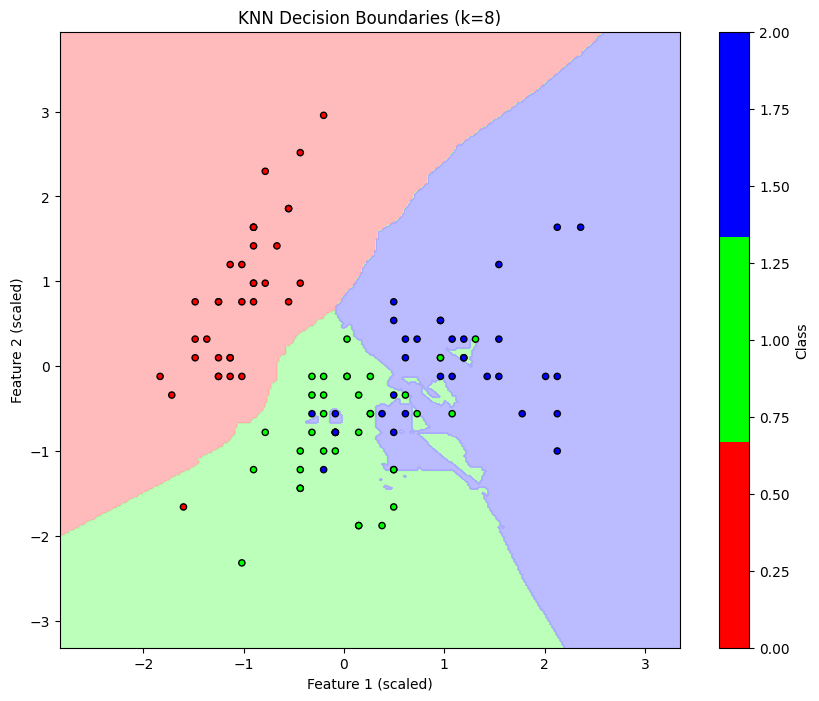

In [8]:
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(X, y, k=best_k):
    # Use only first two features
    X_2d = X[:, :2]
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_2d, y, test_size=0.3, random_state=42, stratify=y
    )
    
    # Scale data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train KNN
    knn = KNNManual(k=k, distance_metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    
    # Create mesh grid
    h = 0.02  # step size
    x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
    y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict for each point in mesh
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(10, 8))
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    scatter = plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, 
                         cmap=cmap_bold, edgecolor='black', s=20)
    plt.colorbar(scatter, label='Class')
    plt.xlabel('Feature 1 (scaled)')
    plt.ylabel('Feature 2 (scaled)')
    plt.title(f'KNN Decision Boundaries (k={k})')
    plt.show()

# Plot decision boundaries for iris dataset
plot_decision_boundaries(X, y, k=best_k)

### using PCA logic instead of the first two features:

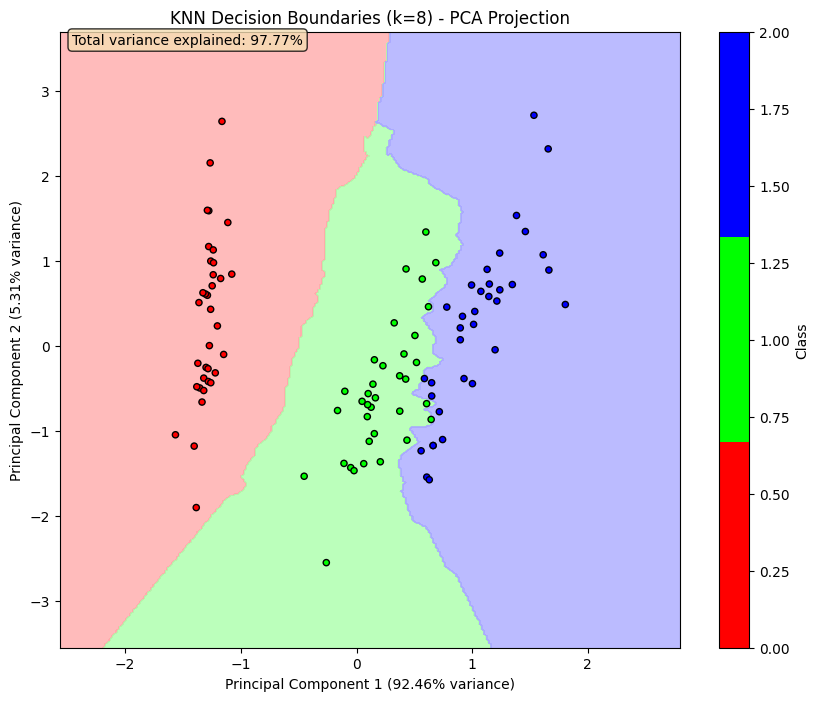

PCA Explained Variance Ratio: [0.92461872 0.05306648]
Total Variance Explained: 97.77%
Accuracy with PCA (2 components): 0.9111


In [9]:
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

def plot_decision_boundaries(X, y, k=best_k):
    # Use PCA to reduce to 2 dimensions (instead of first two features)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_pca, y, test_size=0.3, random_state=42, stratify=y
    )
    
    # Scale data (still important even with PCA)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train KNN
    knn = KNNManual(k=k, distance_metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    
    # Create mesh grid
    h = 0.02  # step size
    x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
    y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict for each point in mesh
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(10, 8))
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    scatter = plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, 
                         cmap=cmap_bold, edgecolor='black', s=20)
    plt.colorbar(scatter, label='Class')
    plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
    plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
    plt.title(f'KNN Decision Boundaries (k={k}) - PCA Projection')
    
    # Add explained variance information
    total_variance = sum(pca.explained_variance_ratio_)
    plt.text(0.02, 0.98, f'Total variance explained: {total_variance:.2%}', 
             transform=plt.gca().transAxes, bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))
    
    plt.show()
    
    # Print PCA information
    print(f"PCA Explained Variance Ratio: {pca.explained_variance_ratio_}")
    print(f"Total Variance Explained: {total_variance:.2%}")
    
    # Calculate accuracy with PCA
    y_pred_pca = knn.predict(X_test_scaled)
    accuracy_pca = accuracy_score(y_test, y_pred_pca)
    print(f"Accuracy with PCA (2 components): {accuracy_pca:.4f}")

# Plot decision boundaries for iris dataset using PCA
plot_decision_boundaries(X, y, k=best_k)

# Exercise 9: Compare KNN with other classifiers

KNN accuracy: 0.9556
Decision Tree accuracy: 0.9111
SVM accuracy: 0.9333
Logistic Regression accuracy: 0.9111

Comparison Table:
            Classifier  Accuracy
0                  KNN  0.955556
1        Decision Tree  0.911111
2                  SVM  0.933333
3  Logistic Regression  0.911111


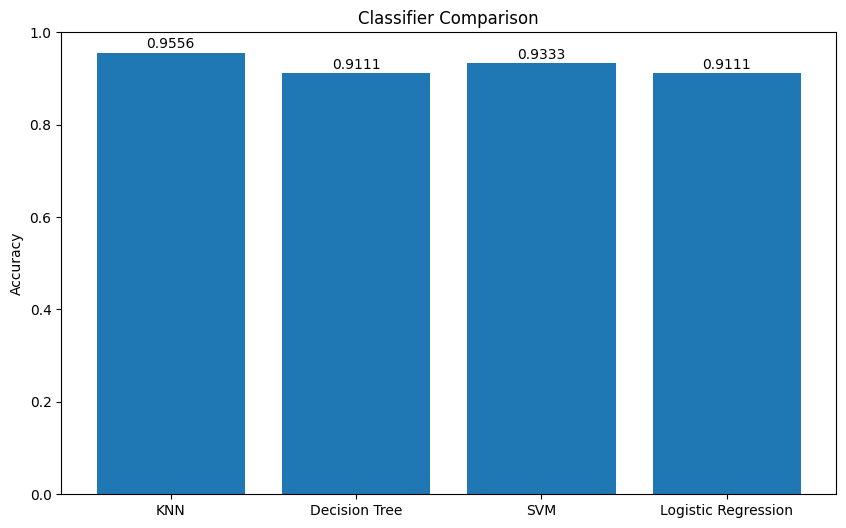

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

def compare_classifiers(X_train, X_test, y_train, y_test):
    classifiers = {
        'KNN': KNNManual(k=8, distance_metric='euclidean'),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'SVM': SVC(random_state=42),
        'Logistic Regression': LogisticRegression(random_state=42)
    }
    
    results = {}
    
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy
        print(f"{name} accuracy: {accuracy:.4f}")
    
    # Create comparison table
    comparison_df = pd.DataFrame(list(results.items()), columns=['Classifier', 'Accuracy'])
    print("\nComparison Table:")
    print(comparison_df)
    
    # Plot comparison
    plt.figure(figsize=(10, 6))
    plt.bar(results.keys(), results.values())
    plt.ylabel('Accuracy')
    plt.title('Classifier Comparison')
    plt.ylim(0, 1)
    for i, v in enumerate(results.values()):
        plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
    plt.show()
    
    return results

# Compare classifiers
classifier_results = compare_classifiers(X_train_scaled, X_test_scaled, y_train, y_test)

# Exercise 10: Identify and analyze misclassified examples

In [11]:
def analyze_misclassified(X_train, X_test, y_train, y_test, k=best_k):
    knn = KNNManual(k=k, distance_metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # Find misclassified examples
    misclassified_indices = np.where(y_pred != y_test)[0]
    
    print(f"Number of misclassified examples: {len(misclassified_indices)}")
    print(f"Misclassified indices: {misclassified_indices}")
    
    # Analyze misclassified examples
    for i, idx in enumerate(misclassified_indices): 
        print(f"\n--- Misclassified Example {i+1} (Test index: {idx}) ---")
        print(f"True label: {y_test[idx]}, Predicted label: {y_pred[idx]}")
        
        # Find nearest neighbors for this misclassified point
        test_point = X_test[idx]
        distances = [np.sqrt(np.sum((test_point - x_train)**2)) for x_train in X_train]
        k_indices = np.argsort(distances)[:k]
        k_distances = [distances[i] for i in k_indices]
        k_labels = [y_train[i] for i in k_indices]
        
        print(f"Nearest neighbors labels: {k_labels}")
        print(f"Distances to neighbors: {[f'{d:.4f}' for d in k_distances]}")
        
        # Check if there's a tie or close distances
        label_counts = {}
        for label in k_labels:
            if label in label_counts:
                label_counts[label] += 1
            else:
                label_counts[label] = 1
        
        print(f"Label distribution in neighbors: {label_counts}")
    
    return misclassified_indices

# Analyze misclassified examples
misclassified = analyze_misclassified(X_train_scaled, X_test_scaled, y_train, y_test)

Number of misclassified examples: 2
Misclassified indices: [ 2 42]

--- Misclassified Example 1 (Test index: 2) ---
True label: 2, Predicted label: 1
Nearest neighbors labels: [np.int64(1), np.int64(1), np.int64(2), np.int64(2), np.int64(1), np.int64(2), np.int64(1), np.int64(1)]
Distances to neighbors: ['0.3654', '0.4325', '0.4386', '0.4597', '0.5053', '0.5272', '0.5334', '0.5759']
Label distribution in neighbors: {np.int64(1): 5, np.int64(2): 3}

--- Misclassified Example 2 (Test index: 42) ---
True label: 2, Predicted label: 1
Nearest neighbors labels: [np.int64(1), np.int64(1), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(2), np.int64(1)]
Distances to neighbors: ['0.7614', '0.9136', '0.9783', '1.0475', '1.0739', '1.1371', '1.1402', '1.1701']
Label distribution in neighbors: {np.int64(1): 6, np.int64(2): 2}


### Commentary on result
The analysis reveals two instances where class 2 samples were misclassified as class 1. In both cases, the local neighborhood was dominated by class 1 samples, with closer proximity and greater numbers. This suggests these samples reside in overlapping regions of the feature space where class boundaries are ambiguous. The misclassifications highlight the challenge KNN faces with borderline cases and the importance of considering both distance-weighted voting and optimal k-value selection to handle such ambiguous regions more effectively.

# Exercise 11: KNN for regression

In [12]:
class KNNRegressor:
    def __init__(self, k=best_k, distance_metric='euclidean', weighted=False):
        self.k = k
        self.distance_metric = distance_metric
        self.weighted = weighted
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)
    
    def _predict(self, x):
        # Calculate distances
        if self.distance_metric == 'euclidean':
            distances = [np.sqrt(np.sum((x - x_train)**2)) for x_train in self.X_train]
        elif self.distance_metric == 'manhattan':
            distances = [np.sum(np.abs(x - x_train)) for x_train in self.X_train]
        
        # Get k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        k_distances = [distances[i] for i in k_indices]
        k_values = [self.y_train[i] for i in k_indices]
        
        if self.weighted:
            # Weighted average (weights = 1/distance)
            weights = [1 / (d + 1e-8) for d in k_distances]
            weighted_sum = sum(w * v for w, v in zip(weights, k_values))
            return weighted_sum / sum(weights)
        else:
            # Simple average
            return np.mean(k_values)

# Test KNN regression
from sklearn.metrics import mean_squared_error, r2_score

def test_knn_regression():
    # Create synthetic regression data
    np.random.seed(40)
    X_reg = np.random.rand(100, 2) * 10
    y_reg = 2 * X_reg[:, 0] + 3 * X_reg[:, 1] + np.random.randn(100) * 2
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_reg, y_reg, test_size=0.3, random_state=42
    )
    
    # Scale data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Test both weighted and non-weighted KNN regression
    knn_reg = KNNRegressor(k=8, weighted=False)
    knn_reg.fit(X_train_scaled, y_train)
    y_pred = knn_reg.predict(X_test_scaled)
    
    knn_reg_weighted = KNNRegressor(k=5, weighted=True)
    knn_reg_weighted.fit(X_train_scaled, y_train)
    y_pred_weighted = knn_reg_weighted.predict(X_test_scaled)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mse_weighted = mean_squared_error(y_test, y_pred_weighted)
    r2 = r2_score(y_test, y_pred)
    r2_weighted = r2_score(y_test, y_pred_weighted)
    
    print(f"Standard KNN Regression - MSE: {mse:.4f}, R²: {r2:.4f}")
    print(f"Weighted KNN Regression - MSE: {mse_weighted:.4f}, R²: {r2_weighted:.4f}")
    
    return mse, mse_weighted, r2, r2_weighted

# Test KNN regression
regression_results = test_knn_regression()

Standard KNN Regression - MSE: 8.8781, R²: 0.9134
Weighted KNN Regression - MSE: 6.8835, R²: 0.9328


# Exercise 12: Cross-validation for KNN

In [13]:
from sklearn.model_selection import cross_val_score

def cross_validate_knn(X, y, k=best_k, cv=5):

    
    knn = KNNManual(k=k)
    
    # Perform cross-validation
    scores = cross_val_score(knn, X, y, cv=cv, scoring='accuracy')
    
    print(f"Cross-validation scores for k={k}: {scores}")
    print(f"Mean accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")
    
    return scores

# Manual cross-validation implementation
def manual_cross_validation(X, y, k=best_k, folds=5):
    from sklearn.model_selection import KFold
    
    kf = KFold(n_splits=folds, shuffle=True, random_state=42)
    scores = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Scale data
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Train and evaluate
        knn = KNNManual(k=k, distance_metric='euclidean')
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        scores.append(accuracy)
    
    print(f"Manual cross-validation scores for k={k}: {scores}")
    print(f"Mean accuracy: {np.mean(scores):.4f} (+/- {np.std(scores) * 2:.4f})")
    
    return scores

# Test cross-validation
cv_scores = cross_validate_knn(X, y, k=best_k)
manual_cv_scores = manual_cross_validation(X, y, k=best_k)

Cross-validation scores for k=8: [1.         1.         0.83333333 0.93333333 0.8       ]
Mean accuracy: 0.9133 (+/- 0.1665)
Manual cross-validation scores for k=8: [1.0, 0.9666666666666667, 0.9666666666666667, 0.9, 0.9333333333333333]
Mean accuracy: 0.9533 (+/- 0.0680)


# Exercise 13: Use KDTree/BallTree for faster neighbor search

In [22]:
from sklearn.neighbors import KDTree, BallTree
import time

def compare_neighbor_search_methods(X_train, X_test, k=best_k):
    # Scale data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Method 1: Brute force (our manual implementation)
    start_time = time.time()
    knn_manual = KNNManual(k=k, distance_metric='euclidean')
    knn_manual.fit(X_train_scaled, y_train)
    y_pred_manual = knn_manual.predict(X_test_scaled)
    brute_force_time = time.time() - start_time
    
    # Method 2: KDTree
    start_time = time.time()
    kdtree = KDTree(X_train_scaled)
    distances_kd, indices_kd = kdtree.query(X_test_scaled, k=k)
    y_pred_kd = [Counter(y_train[indices]).most_common(1)[0][0] 
                for indices in indices_kd]
    kdtree_time = time.time() - start_time
    
    # Method 3: BallTree
    start_time = time.time()
    balltree = BallTree(X_train_scaled)
    distances_ball, indices_ball = balltree.query(X_test_scaled, k=k)
    y_pred_ball = [Counter(y_train[indices]).most_common(1)[0][0] 
                  for indices in indices_ball]
    balltree_time = time.time() - start_time
    
    # Compare accuracy and timing
    accuracy_manual = accuracy_score(y_test, y_pred_manual)
    accuracy_kd = accuracy_score(y_test, y_pred_kd)
    accuracy_ball = accuracy_score(y_test, y_pred_ball)
    
    print("Neighbor Search Method Comparison:")
    print(f"Brute Force - Time: {brute_force_time:.4f}s, Accuracy: {accuracy_manual:.4f}")
    print(f"KDTree - Time: {kdtree_time:.4f}s, Accuracy: {accuracy_kd:.4f}")
    print(f"BallTree - Time: {balltree_time:.4f}s, Accuracy: {accuracy_ball:.4f}")
    
    return {
        'brute_force': (brute_force_time, accuracy_manual),
        'kdtree': (kdtree_time, accuracy_kd),
        'balltree': (balltree_time, accuracy_ball)
    }

# Compare search methods
search_results = compare_neighbor_search_methods(X_train, X_test)

Neighbor Search Method Comparison:
Brute Force - Time: 0.0340s, Accuracy: 0.9556
KDTree - Time: 0.0012s, Accuracy: 0.9556
BallTree - Time: 0.0012s, Accuracy: 0.9556


# Exercise 14: Study the impact of noise on KNN performance

Noise level: 0.00
  Feature noise accuracy: 1.0000
  Label noise accuracy: 1.0000
Noise level: 0.05
  Feature noise accuracy: 1.0000
  Label noise accuracy: 0.9111
Noise level: 0.10
  Feature noise accuracy: 0.9556
  Label noise accuracy: 0.8667
Noise level: 0.20
  Feature noise accuracy: 0.9333
  Label noise accuracy: 0.8222
Noise level: 0.30
  Feature noise accuracy: 0.9333
  Label noise accuracy: 0.6222


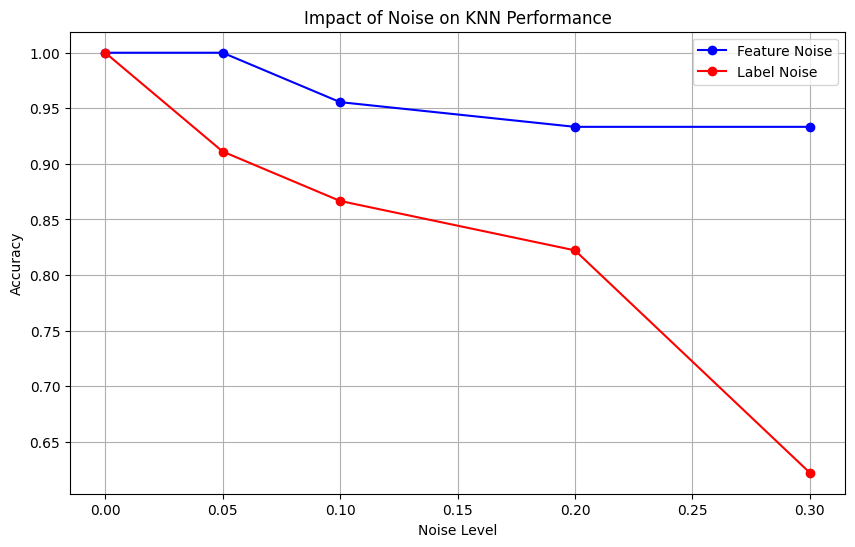

In [23]:
def add_noise_to_data(X, y, noise_level=0.1, label_noise=False):
    X_noisy = X.copy()
    y_noisy = y.copy()
    
    if label_noise:
        # Add label noise (randomly flip some labels)
        n_noisy_labels = int(noise_level * len(y))
        noisy_indices = np.random.choice(len(y), n_noisy_labels, replace=False)
        for idx in noisy_indices:
            # Flip to a different random label
            possible_labels = [l for l in np.unique(y) if l != y[idx]]
            if possible_labels:  # Check if there are other labels
                y_noisy[idx] = np.random.choice(possible_labels)
    else:
        # Add feature noise
        noise = np.random.normal(0, noise_level, X.shape)
        X_noisy = X + noise
    
    return X_noisy, y_noisy

def test_noise_impact(X, y, noise_levels=[0.0, 0.05, 0.1, 0.2, 0.3]):
    feature_noise_accuracies = []
    label_noise_accuracies = []
    
    for noise_level in noise_levels:
        # Test feature noise
        X_noisy, y_noisy = add_noise_to_data(X, y, noise_level, label_noise=False)
        X_train, X_test, y_train, y_test = train_test_split(
            X_noisy, y_noisy, test_size=0.3, random_state=42
        )
        
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        knn = KNNManual(k=5, distance_metric='euclidean')
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)
        feature_accuracy = accuracy_score(y_test, y_pred)
        feature_noise_accuracies.append(feature_accuracy)
        
        # Test label noise
        X_noisy, y_noisy = add_noise_to_data(X, y, noise_level, label_noise=True)
        X_train, X_test, y_train, y_test = train_test_split(
            X_noisy, y_noisy, test_size=0.3, random_state=42
        )
        
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)
        label_accuracy = accuracy_score(y_test, y_pred)
        label_noise_accuracies.append(label_accuracy)
        
        print(f"Noise level: {noise_level:.2f}")
        print(f"  Feature noise accuracy: {feature_accuracy:.4f}")
        print(f"  Label noise accuracy: {label_accuracy:.4f}")
    
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(noise_levels, feature_noise_accuracies, 'bo-', label='Feature Noise')
    plt.plot(noise_levels, label_noise_accuracies, 'ro-', label='Label Noise')
    plt.xlabel('Noise Level')
    plt.ylabel('Accuracy')
    plt.title('Impact of Noise on KNN Performance')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return feature_noise_accuracies, label_noise_accuracies

# Test noise impact
feature_accuracies, label_accuracies = test_noise_impact(X, y)

# Exercise 15: Interactive application for visualizing neighbors

### Check the **app** folder